In [1]:
import keras

Using TensorFlow backend.


目前，Keras 有三个后端实现可用: TensorFlow 后端，Theano 后端，CNTK 后端。

TensorFlow 是由 Google 开发的一个开源符号级张量操作框架。
Theano 是由蒙特利尔大学的 LISA Lab 开发的一个开源符号级张量操作框架。
CNTK 是由微软开发的一个深度学习开源工具包。
Cell Type->Markdown是能在這個筆記本中做註解

In [2]:
%env KERAS_NACKEND=tensorflow

env: KERAS_NACKEND=tensorflow


%env 可以用來設定環境變數

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from keras.datasets import mnist

讀入MNIST資料庫
此資料庫有一堆0-9的手寫數字圖庫。有6w筆訓練資料，1萬筆測試資料。他是NIST數據庫的簡化版，MNIST可以說是Deep Learning最有名的範例，他被Deep learning大師 Hinton稱為(機器學習的果蠅)
x為輸入，y為答案


In [5]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()


11493376/11490434 [==============================] - 1s 0us/step


In [6]:
len(x_train)

60000

In [7]:
len(y_train)


60000

In [8]:
x_train[9487].shape

(28, 28)

每筆輸入x就是一個手寫的0-9中一個數字的圖檔，大小為28*28。而輸出y當然就是正確答案。來看編號9487訓練資料的大小

In [9]:
x_train[9487]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

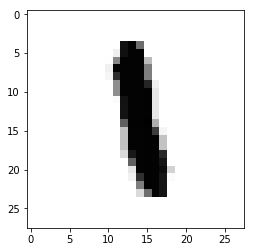

In [10]:
plt.imshow(x_train[9487],cmap='Greys')

In [11]:
y_train[9487]

1

2.3輸入格式整理
我們現在要用標準神經網路學手寫辨識，原來的每筆數據為28*28矩陣，但標準神經網路只能輸入平向量，也就是每次要28*28=784長的向量。因此我們要用reshape調整一下

In [0]:
x_train = x_train.reshape(60000,784)

In [13]:
x_train.shape

(60000, 784)

In [0]:
x_test = x_test.reshape(10000,784)

In [15]:
x_test.shape

(10000, 784)

2.4輸出格式整理
我們可能會想，我們想學的函數是f: R^784->R
但神經網路總有誤差 所以可能會得到f(x)=0.5
那這意思是可能是0，也有可能是1
於是我們會做"1-hot encoding",也就是
1 ->[0,1,0,0,0,0,0,0,0,0]
Keras其實已幫我們準備好套件了

In [0]:
from keras.utils import np_utils

In [0]:
y_train = np_utils.to_categorical(y_train,10)

In [0]:
y_test= np_utils.to_categorical(y_test,10)

In [19]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

3.打造地一個神經網路
我們決定了我們的函數是f:R^784->R^10
我們還要決定要幾個隱藏層，每層要幾個神經元，用哪個機方函數就可以了
3.1決定神經網路架構、讀入相關套件
假設我們要這麼做
使用2個hidden layers
每個hidden layer用500個神經元
activation function指名用sigmoid
於是從keras把相關套件讀入

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD

dense就是你常用的的全连接层

3.2建構我們的神經網路
和以前做迴歸或機器學習一樣，我們就打開一個函數學習機，標準一層一層傳遞的神經網路叫sequential,於是我們打開一個空的神經網路

In [21]:
model = Sequential()

W0826 12:55:05.543166 139665265489792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



我們每次用add去加一層，從一個隱藏層開始。而第一個隱藏層因為Keras當然猜不到輸入有幾個features,所以我們要告訴他

In [22]:
model.add(Dense(500,input_dim=784))


W0826 12:55:05.601846 139665265489792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0826 12:55:05.616751 139665265489792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [0]:
model.add(Activation('sigmoid'))


第二層hidden layer 因為前面輸出是500，所以只要一個參數引入

In [0]:
model.add(Dense(500))
model.add(Activation('sigmoid'))

輸出有10個數字，所以齣齣的神經元是10
我們希望輸出加起來等於1，那這裡用softmax當activation 函數就ok

In [0]:
model.add(Dense(10))
model.add(Activation('softmax'))

至此我們神經網路做完了

3.3組裝

和之前比較不一樣的是我們還要做compile才能正式把我們的神經網路建好，你可以發現我們還需要做幾件事:

決定使用的loss function,一般是mse

決定optimizer,我們用標準的SGD

設learning rate

為了一邊訓練一邊看結果，我們加設

metrics=['accuracy']

In [26]:
model.compile(loss='mse',optimizer=SGD(lr=0.1),metrics=['accuracy'])

W0826 12:55:05.748629 139665265489792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



檢視我們的神經網路

In [27]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 500)               392500    
_________________________________________________________________
activation_1 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 500)               250500    
_________________________________________________________________
activation_2 (Activation)    (None, 500)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [28]:
#392500
784*500+500


392500

In [29]:
#250500 b=500
500*500+500

250500

In [30]:
#500
500*10+10

5010

5.訓練你的第一個神經網路

現在訓練時，不能像以前一樣沒頭沒腦的把訓練資料送進去，這裡我們還有兩件事要做

一次要訓練幾筆資料(batch_size),我們就100筆調一次參數

這6萬筆資料一共要訓練幾次(epochs)，我們訓練個20次試試

In [31]:
model.fit(x_train,y_train,batch_size=100,epochs=20)

W0826 12:55:05.998699 139665265489792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0826 12:55:06.026197 139665265489792 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/20
60000/60000 [==============================] - 8s 138us/step - loss: 0.0812 - acc: 0.3831
Epoch 2/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0613 - acc: 0.6238
Epoch 3/20
60000/60000 [==============================] - 8s 130us/step - loss: 0.0444 - acc: 0.7637
Epoch 4/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0324 - acc: 0.8514
Epoch 5/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0251 - acc: 0.8765
Epoch 6/20
60000/60000 [==============================] - 8s 127us/step - loss: 0.0210 - acc: 0.8899
Epoch 7/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0184 - acc: 0.8991
Epoch 8/20
60000/60000 [==============================] - 7s 123us/step - loss: 0.0166 - acc: 0.9065
Epoch 9/20
60000/60000 [==============================] - 8s 126us/step - loss: 0.0153 - acc: 0.9120
Epoch 10/20
60000/60000 [==============================] - 8s 128us/step - loss: 0.0143 - a

我們用一個比較炫的方式來看訓練成果

In [0]:
from ipywidgets import interact_manual

predict_classes會讓我們keras選10個輸出機率最大的那類

In [0]:
predict = model.predict_classes(x_test)

In [0]:
def test(測試):
    plt.imshow(x_test[測試].reshape(28,28),cmap="Greys")
    print("神經網路判斷為:",predict[測試])

In [35]:
interact_manual(test,測試=(0,9999));

interactive(children=(IntSlider(value=4999, description='測試', max=9999), Button(description='Run Interact', st…

把神經網路存起來

之前沒裝pyh5要在終端機下安裝:

conda install h5py

In [0]:
model_json =model.to_json()
open('handwrite_model.json','w').write(model_json)
model.save_weights('handwriting model weights.h5')